
<img src="../../img/ods_stickers.jpg">

## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению 
    
Автор материала: Екатерина Демидова, Data Scientist @ Segmento. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: 

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
plt.rcParams["figure.figsize"] = (10, 8)

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs). Скачайте [данные](https://drive.google.com/file/d/1nV2qV9otN3LnVSDqy95hvpJdb6aWtATk/view?usp=sharing) соревнования (данные были удалены с Kaggle ради организации последующего идентичного соревнования, так что тут ссылка на Google Drive).

In [3]:
# при необходимости поменяйте путь к данным
df = pd.read_csv("../../data/howpop_train.csv")

In [4]:
df.shape

(134137, 17)

In [5]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [6]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [8]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/176325/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [9]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [10]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [11]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

In [13]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [94]:
df.domain.unique()

array(['habrahabr.ru', 'geektimes.ru'], dtype=object)

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

In [33]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

df['mnth_yr'] = df['published'].apply(lambda x: x.strftime('%B-%Y'))
years_df = df.groupby('mnth_yr')[["post_id"]].count()

years_df.columns = ["Count_posting"]

trace0=go.Scatter(x=years_df.index, y=years_df.Count_posting,
                  name="Count_posting")

layout={"title": "Statistics of publications"}

fig=go.Figure(data=trace0, layout=layout)

iplot(fig, show_link=False)

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

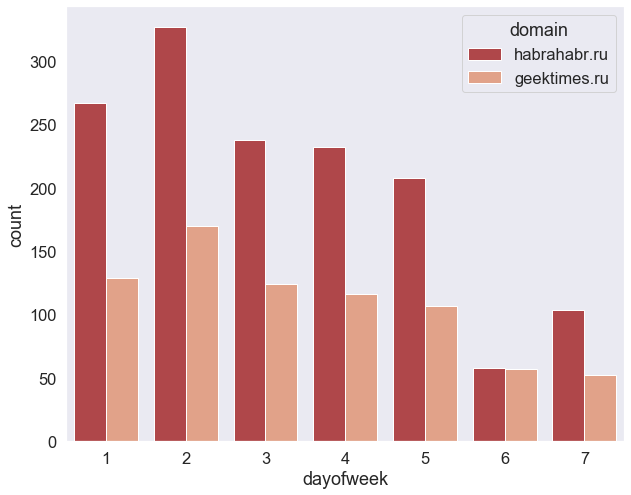

In [161]:
bestmonth_df = df[(df['year'] == 2015) & (df['month'] == 3)]


sns.countplot(x="dayofweek", hue="domain", data=bestmonth_df)


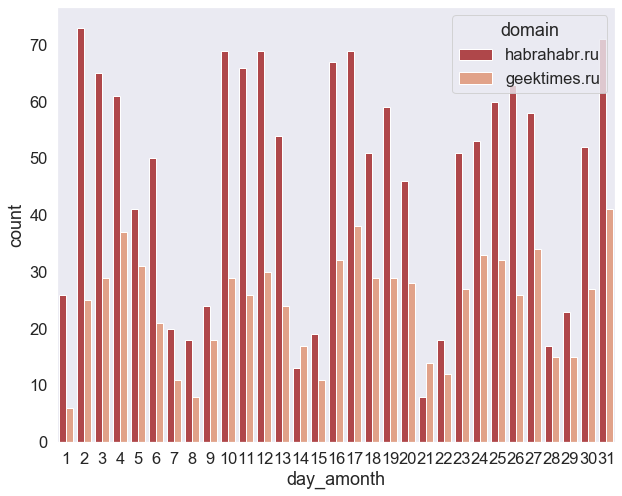

In [162]:
df['day_amonth'] = df.published.apply(lambda x: x.day)

sns.countplot(x="day_amonth", hue="domain", data=bestmonth_df)

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [138]:
best_time_public = df\
    .groupby('hour')[['views']].mean()\
    .join(best_time_public_habr.groupby('hour')[['comments']].mean())

In [139]:
trace0 = go.Bar(x=best_time_public.index, y=best_time_public.views/100, name="views/100")
trace1 = go.Bar(x=best_time_public.index, y=best_time_public.comments, name="comments")
data = [trace0, trace1]
layout = {"title": "Statistic for Habr"}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [140]:
df[df.domain == 'geektimes.ru'].sort_values('comments', ascending=False)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,mnth_yr,day_amonth
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2,2011-07-01,1
65285,https://geektimes.ru/post/171853/,geektimes.ru,171853,2013-03-06 20:07:00,@vadimus,NaN,False,2220,Лучшие компьютерные игры всех времен и народов...,1887,392,160000,170.0,29.0,2013,3,3,20,2013-03-01,6
38742,https://geektimes.ru/post/123122/,geektimes.ru,123122,2011-06-30 17:10:00,@MetallicAt,NaN,False,1390,Раздача слонов или инвайты на Google+,1829,17,1200,275.0,50.0,2011,6,4,17,2011-06-01,30
126328,https://geektimes.ru/post/276000/,geektimes.ru,276000,2016-05-18 21:43:00,@alizar,NaN,False,5207,Завершено самое масштабное исследование влияни...,1578,234,165000,76.0,7.0,2016,5,3,21,2016-05-01,18
127407,https://geektimes.ru/post/276928/,geektimes.ru,276928,2016-06-07 12:28:00,@veam,NaN,False,4832,«10 лет за школьную форму и хентай» сегодня ве...,1214,56,130000,40.0,6.0,2016,6,2,12,2016-06-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108299,https://geektimes.ru/post/259930/,geektimes.ru,259930,2015-08-07 21:30:00,@SLY_G,NaN,False,2790,Как чёрная дыра в центре галактики регулирует ...,0,14,9000,12.0,2.0,2015,8,5,21,2015-08-01,7
20885,https://geektimes.ru/post/86272/,geektimes.ru,86272,2010-03-03 22:54:00,@noonv,NaN,False,384,iPhone управляет роботом-шестиногом с помощью ...,0,1,281,3.0,5.0,2010,3,3,22,2010-03-01,3
91679,https://geektimes.ru/post/241284/,geektimes.ru,241284,2014-11-12 11:21:00,@ivansychev,NaN,False,4873,3D печать в микромасштабе,0,9,3900,19.0,0.0,2014,11,3,11,2014-11-01,12
103634,https://geektimes.ru/post/251162/,geektimes.ru,251162,2015-05-29 11:10:00,@marks,NaN,False,2146,Зонд Dawn прислал новые фотографии Цереры,0,4,8300,21.0,1.0,2015,5,5,11,2015-05-01,29


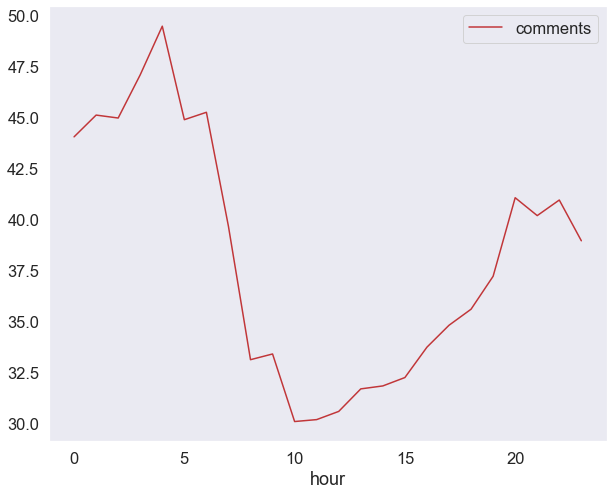

In [143]:
df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean().plot()

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [144]:
top_authors = list(df.author.value_counts(ascending = False).head(20).index)
top_authors_df = df[df.author.isin(top_authors)]
hist_info = top_authors_df.groupby('author').votes_minus.mean()

trace0 = go.Bar(x=hist_info.index, y=hist_info.values, name="Dislikes for Top authors")
fig = go.Figure(data=trace0)
iplot(fig, show_link=False)

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

In [130]:
monday = df[df.dayofweek == 1].groupby('hour')['post_id'].count()
saturday = df[df.dayofweek == 6].groupby('hour')['post_id'].count()

trace0 = go.Bar(x=monday.index, y=monday.values, name="Monday")
trace1 = go.Bar(x=saturday.index, y=saturday.values, name="Saturday")
data = [trace0, trace1]
layout = {"title": "Statistic for 2 day a week"}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [131]:
df.author.value_counts(ascending = False)

@alizar              5292
@marks               4711
@SLY_G               1939
@ivansychev          1350
@semen_grinshtein    1171
                     ... 
@Georg93                1
@serebroff              1
@devpony                1
@idxtr                  1
@vplka                  1
Name: author, Length: 22077, dtype: int64